In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

Using TensorFlow backend.


In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [5]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'C:/Users/NAHUSHA/Music/Efficient detection of brain tumor using CNN/archive (1)/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [6]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"C:/Users/NAHUSHA/Music/Efficient detection of brain tumor using CNN/archive (1)/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [7]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [8]:
result = np.array(result)
result = result.reshape(139,2)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

In [11]:
y_train.shape

(111, 2)

In [12]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 12s 1s/step - loss: 24.6933 - val_loss: 35.0614
Epoch 2/30
3/3 [==============================] - 0s 110ms/step - loss: 26.4447 - val_loss: 16.5417
Epoch 3/30
3/3 [==============================] - 0s 110ms/step - loss: 8.1958 - val_loss: 11.5083
Epoch 4/30
3/3 [==============================] - 0s 112ms/step - loss: 3.9895 - val_loss: 13.2880
Epoch 5/30
3/3 [==============================] - 0s 110ms/step - loss: 2.6763 - val_loss: 11.9418
Epoch 6/30
3/3 [==============================] - 0s 110ms/step - loss: 2.1122 - val_loss: 15.8926
Epoch 7/30
3/3 [==============================] - 0s 111ms/step - loss: 1.2670 - val_loss: 14.0576
Epoch 8/30
3/3 [==============================] - 0s 107ms/step - loss: 0.7321 - val_loss: 11.9871
Epoch 9/30
3/3 [==============================] - 0s 105ms/step - loss: 0.2602 - val_loss: 10.6856
Epoch 10/30
3/3 [==============================] - 0s 111ms/step - loss: 0.0426 - val_loss: 9.4574
Epoch 11/3

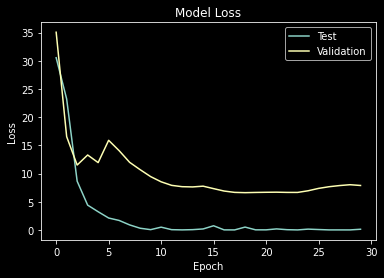

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [14]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is Its a Tumor


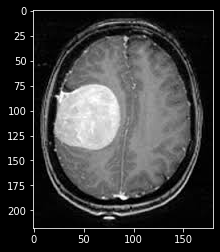

In [16]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\NAHUSHA\Music\Efficient detection of brain tumor using CNN\archive (1)\yes\Y1.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A No, Its not a tumor


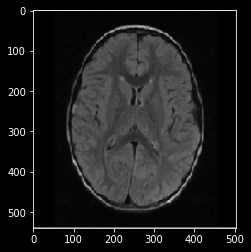

In [17]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\NAHUSHA\Music\Efficient detection of brain tumor using CNN\archive (1)\no\no 89.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

100.0% Confidence This Is A Its a Tumor


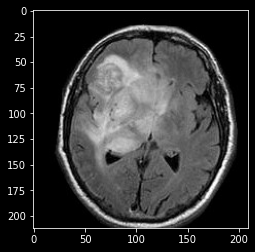

In [18]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\NAHUSHA\Music\Efficient detection of brain tumor using CNN\archive (1)\yes\Y2.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

100.0% Confidence This Is A No, Its not a tumor


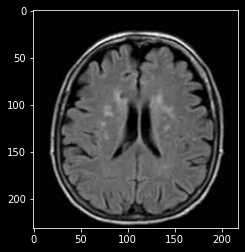

In [19]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\NAHUSHA\Music\Efficient detection of brain tumor using CNN\archive (1)\no\17 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))